In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image

In [3]:
train_dir=r'E:\Deep Learning\CNN\Take Home Assignment on CNN\Dataset\Dataset\training_set'
test_dir=r'E:\Deep Learning\CNN\Take Home Assignment on CNN\Dataset\Dataset\test_set'

In [4]:
#image preprocessing
train_datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,rescale=1/255,
                                validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [7]:
train_gene=train_datagen.flow_from_directory(directory=train_dir,target_size=(48,48),batch_size=64,
                                             color_mode='grayscale',class_mode='categorical',subset='training')
test_gene=test_datagen.flow_from_directory(directory=test_dir,target_size=(48,48),batch_size=64,
                                             color_mode='grayscale',class_mode='categorical',subset='validation')

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


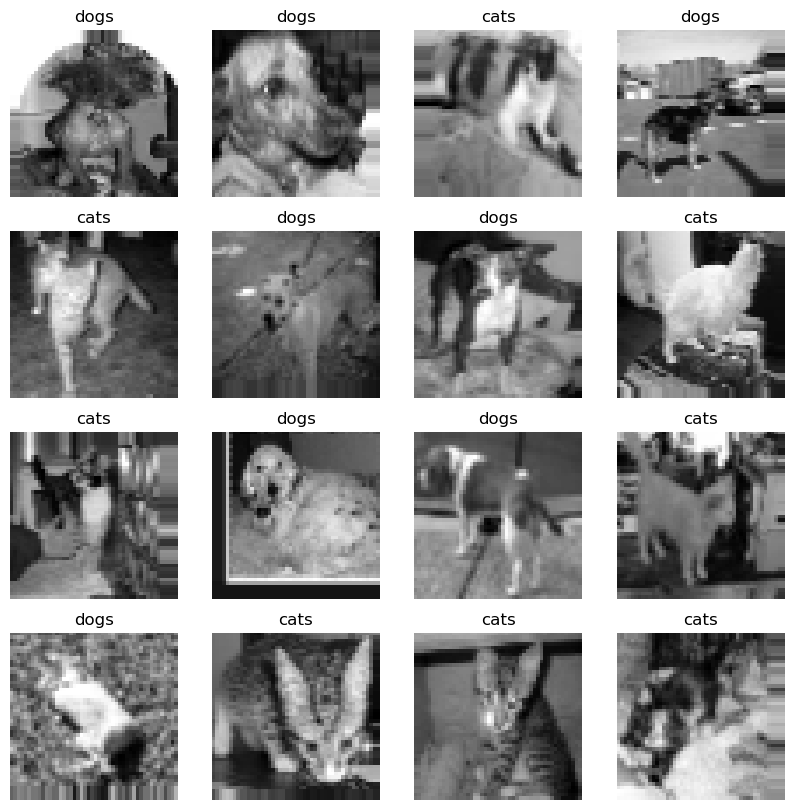

In [8]:
batch=next(train_gene)
fig, axes= plt.subplots(nrows=4,ncols=4,figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(batch[0][i],cmap='gray')
    label_idx=batch[1][i].argmax()
    label_map={v:k for k,v in train_gene.class_indices.items()}
    ax.set_title(label_map[label_idx])
    ax.axis('off')
plt.show()

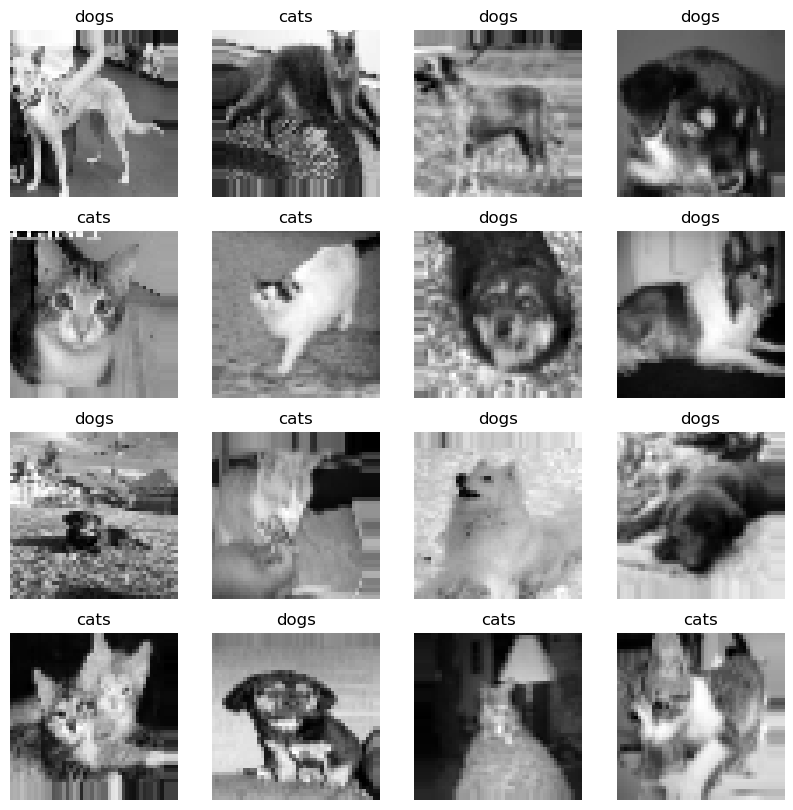

In [9]:
batch=next(train_gene)
fig, axes= plt.subplots(nrows=4,ncols=4,figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(batch[0][i],cmap='gray',interpolation='nearest')
    label_idx=batch[1][i].argmax()
    label_map={v:k for k,v in train_gene.class_indices.items()}
    ax.set_title(label_map[label_idx])
    ax.axis('off')
plt.show()

In [14]:
model=Sequential()
#adding first convolutional layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
#adding batch normalization layer
model.add(BatchNormalization())
#adding second convolutional layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#adding second batch normalization layer
model.add(BatchNormalization())
#adding maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#adding dropout layer
model.add(Dropout(0.25))
#output for convolutional layers
model.add(Flatten())
#adding dense layer
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
#compiling
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])
#printing summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       1,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001,858 (7.64 MB)

 Trainable params: 2,001,666 (7.64 MB)

 Non-trainable params: 192 (768.00 B)

In [15]:
checkpoint_callback=ModelCheckpoint(filepath='model.weights.h5',monitor='val_accuracy',save_best_only=True,
                                    save_weights_only=True,mode='max',verbose=1)
history=model.fit(train_gene,batch_size=64,epochs=10,validation_data=test_gene,callbacks=[checkpoint_callback])

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5385 - loss: 0.9908
Epoch 1: val_accuracy improved from -inf to 0.51500, saving model to model.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5398 - loss: 0.9876 - val_accuracy: 0.5150 - val_loss: 0.6886
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6188 - loss: 0.7114
Epoch 2: val_accuracy improved from 0.51500 to 0.54500, saving model to model.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.6188 - loss: 0.7108 - val_accuracy: 0.5450 - val_loss: 0.6832
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6139 - loss: 0.6713
Epoch 3: val_accuracy improved from 0.54500 to 0.59000, saving model to model.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6147 - loss: 0.6707 - val_accuracy: 0.5900 - val_loss: 0.6919
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6439 - loss: 0.6294
Epoch 4: val_accuracy did not improve from 0.59000
25/25 ━━

In [16]:
validation_loss,validation_acc=model.evaluate(test_gene)
print('Validation Loss:',validation_loss)
print('Validation Accuracy:',validation_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.5824 - loss: 0.6777
Validation Loss: 0.661476731300354
Validation Accuracy: 0.5899999737739563


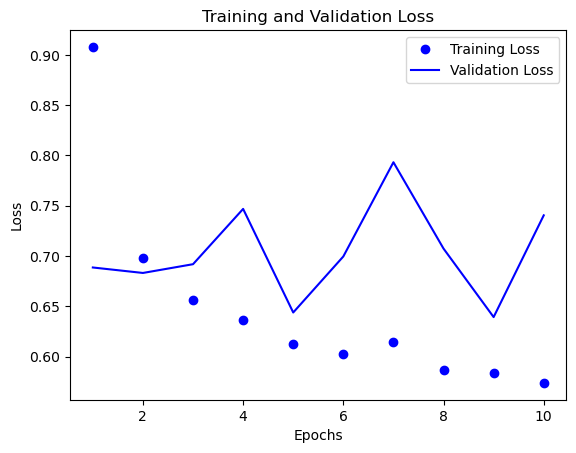

In [17]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

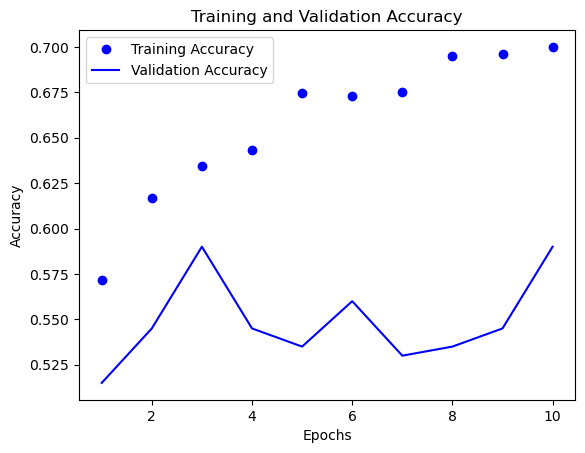

In [18]:
train_loss=history.history['accuracy']
val_loss=history.history['val_accuracy']
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'bo',label='Training Accuracy')
plt.plot(epochs,val_loss,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step


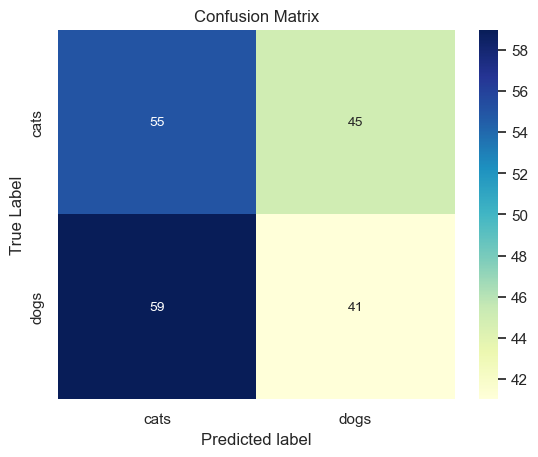

In [20]:
validation_labels=test_gene.classes
validation_pred_probs=model.predict(test_gene)
validation_pred_labels=np.argmax(validation_pred_probs,axis=1)
cm=confusion_matrix(validation_labels,validation_pred_labels)
class_names=list(train_gene.class_indices.keys())
sns.set()
sns.heatmap(cm,annot=True,fmt='d',annot_kws={'size':10},cmap='YlGnBu',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
img_path = r"E:\Deep Learning\CNN\cat1.jpg"
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')   
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  
prediction = model.predict(img_array) 
label_map = {v:k for k,v in train_gene.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print(" Animal predicted in this image is", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
 Animal predicted in this image is cats


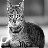

In [26]:
img

In [27]:
img_path = r"E:\Deep Learning\CNN\dog.jpg"
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')   
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  
prediction = model.predict(img_array) 
label_map = {v:k for k,v in train_gene.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print("Animal predicted in this image is", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Animal predicted in this image is dogs


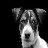

In [28]:
img

In [29]:
img_path = r"E:\Deep Learning\CNN\cat2.jpg"
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')   
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  
prediction = model.predict(img_array) 
label_map = {v:k for k,v in train_gene.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print("Animal predicted in this image is", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Animal predicted in this image is cats


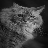

In [30]:
img

In [37]:
img_path = r"E:\Deep Learning\CNN\dog3.jpg"
img = image.load_img(img_path, target_size=(48,48), color_mode='grayscale')   
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  
prediction = model.predict(img_array) 
label_map = {v:k for k,v in train_gene.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print("Animal predicted in this image is", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Animal predicted in this image is dogs


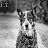

In [38]:
img